<a href="https://colab.research.google.com/github/somayehpakdel/aptos_classification/blob/test_branch/generate_image_CondStylegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating Images From Pretrained Conditional_Stylegan

In [5]:
#path to Stylegan (version tensorflow2) in conditional mode
%cd /content/drive/MyDrive/aptos256_preprocessed/stylegan_tf2/stylegan

/content/drive/MyDrive/stylegan_tf2/stylegan


0


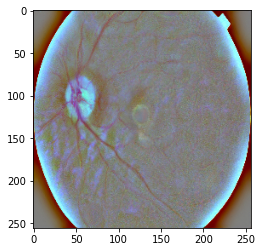

In [13]:
import pickle
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import PIL.Image
from matplotlib import pyplot



lats=[]
imgs=[]
url = '/content/drive/MyDrive/aptos256_preprocessed/stylegan_tf2/pretrained_constylegan/aptos/network-snapshot-001400.pkl'
with tf.Session() as sess:
     with open(url, 'rb') as file:
          G, D, Gs = pickle.load(file)
     for i in range(1):
          print(i)
          latents = np.random.randn(1, 512) # 1000 random latents
          lats.append(latents)
          labels=np.array([1,0,0,0,0])
          images = Gs.run(latents,labels.reshape(1,5))
          images = np.clip(np.rint((images + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8) # [-1,1] => [0,255]
          images = images.transpose(0, 2, 3, 1) # NCHW => NHWC
          imgs.append(images)

pyplot.imshow(images.reshape(256,256,3),vmin=0, vmax=255)
pyplot.show()


In [11]:
len(imgs),imgs[0].shape,images.shape

(1, (1, 256, 256, 3), (1, 256, 256, 3))